In [38]:
#Install package to plot correlation matrix
#install.packages("corrplot")
library(glue)

library(corrgram)

#general R custom data loader function
data_loader <-function(file_path,separator,head=TRUE){
  
  return(read.table(file_path,sep=separator,header = head))
}


In [30]:
corr_arr <- function(a,b){
  
  corr = 0
  a_bar <-  sum(a)/length(a)
  
  b_bar <- sum(b)/length(b)
  
  var_a  =  sum((a - a_bar)^2)/(length(a) - 1)
  
  var_b  =  sum((b - b_bar)^2)/(length(b) - 1)
  
  covar_a_b =  sum((a -  a_bar) * (b -  b_bar))/ (length(b) - 1)
  
  corr = covar_a_b/sqrt(var_a * var_b)
  return(corr)
}
data <-  data_loader("data_purchase_behaviour.csv",",")
data$X <- NULL


In [31]:
display_correlation  <-  function(data){
  #we are encoding the sex feature (F,M) -> (1,2)
  data$City_Category = as.numeric(factor(data$City_Category,levels = c(unique(data$City_Category)),labels = c(1, 2,3)))
  data$Gender = as.numeric(factor(data$Gender,levels = c("F","M"),labels = c(1, 2)))
  result <- matrix(, nrow = ncol(data), ncol =ncol(data))
  for (i in  1:ncol(data)){
    for (j in 1:ncol(data)){
      result[i,j] <- corr_arr(data[,i],data[,j])
    }
  }
  colnames(result) <- colnames(data)
  rownames(result) <- colnames(data)
  return(result)
}

In [32]:
display_correlation(data)

,User_ID,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Age_num,Purchase
User_ID,1.000000000,-0.034134818,0.027642089,-0.029020530,0.0238976986,0.036897191,0.0073416443
Gender,-0.034134818,1.000000000,-0.005230666,0.013860140,-0.0102179171,0.001798109,0.0605722322
City_Category,0.027642089,-0.005230666,1.000000000,0.023988941,0.0396761385,0.123404239,0.0630847513
Stay_In_Current_City_Years,-0.029020530,0.013860140,0.023988941,1.000000000,-0.0142119697,-0.005657654,0.0015260475
Marital_Status,0.023897699,-0.010217917,0.039676138,-0.014211970,1.0000000000,0.300598738,0.0001091632
Age_num,0.036897191,0.001798109,0.123404239,-0.005657654,0.3005987381,1.000000000,0.0156330549
Purchase,0.007341644,0.060572232,0.063084751,0.001526048,0.0001091632,0.015633055,1.0000000000


In [33]:
res <-  display_correlation(data)
options(repr.plot.width=14, repr.plot.height=8)

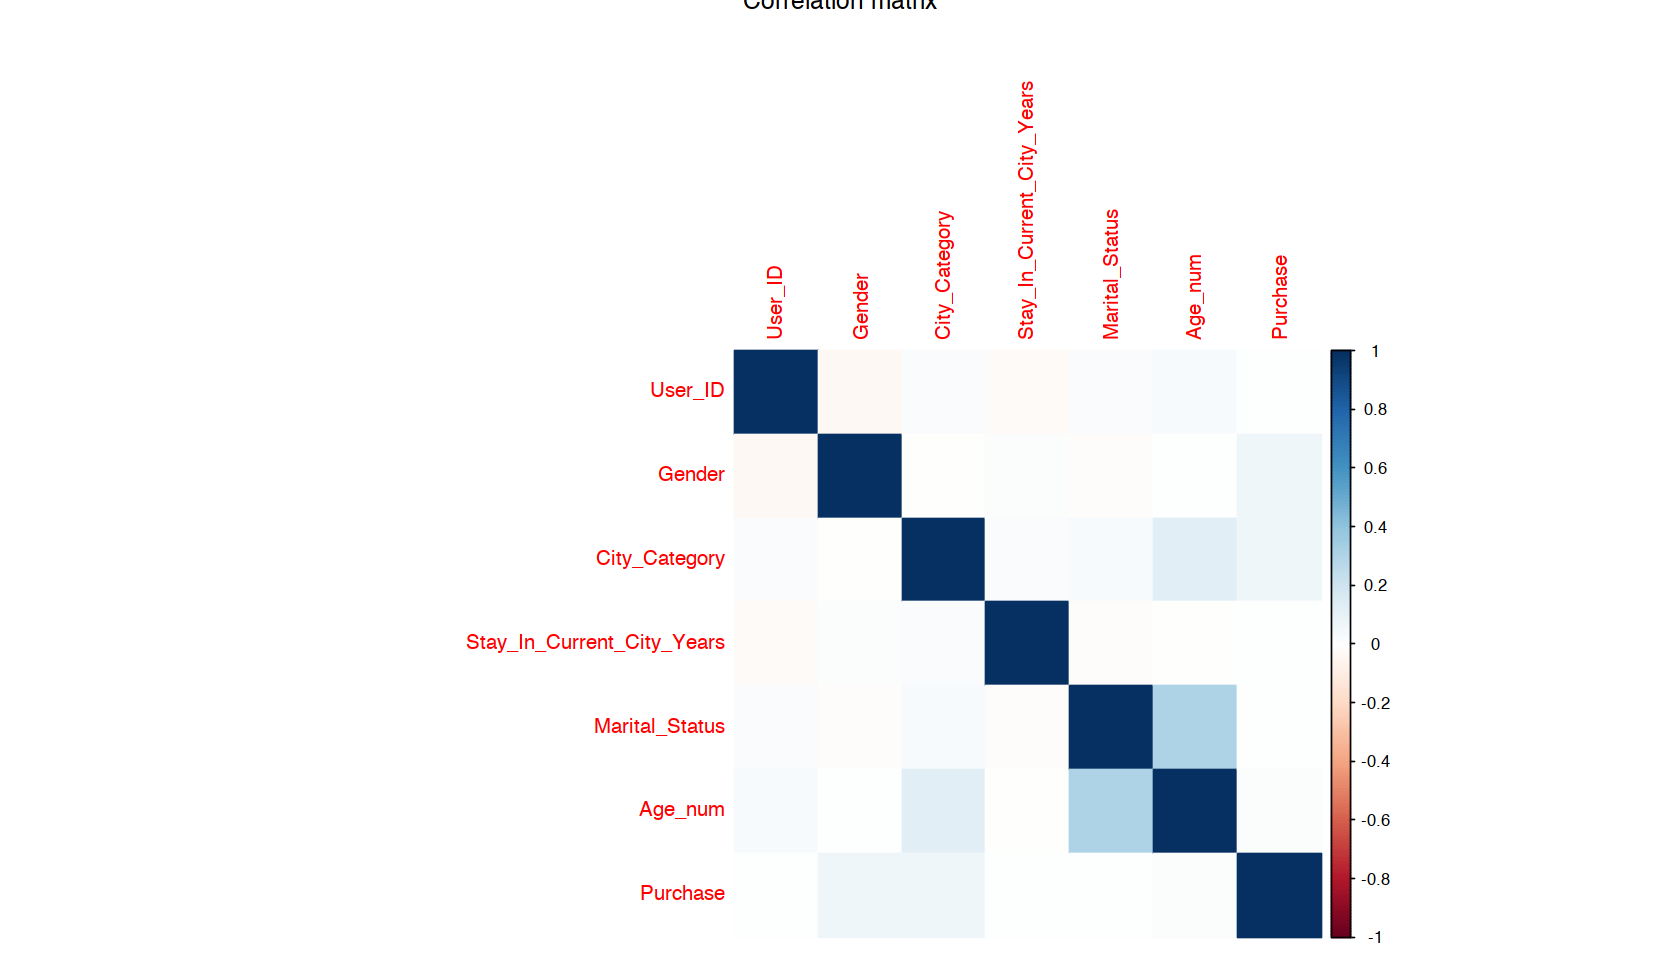

In [34]:
corrplot::corrplot(res,method="color",title="Correlation matrix")

In [35]:
summary(data)

    User_ID           Gender          City_Category     
 Min.   :1000001   Length:159000      Length:159000     
 1st Qu.:1001523   Class :character   Class :character  
 Median :1003084   Mode  :character   Mode  :character  
 Mean   :1003033                                        
 3rd Qu.:1004482                                        
 Max.   :1006040                                        
 Stay_In_Current_City_Years Marital_Status     Age_num         Purchase    
 Min.   :0.000              Min.   :0.000   Min.   :10.00   Min.   :   12  
 1st Qu.:1.000              1st Qu.:0.000   1st Qu.:27.00   1st Qu.: 5828  
 Median :2.000              Median :0.000   Median :33.00   Median : 8044  
 Mean   :1.856              Mean   :0.411   Mean   :34.81   Mean   : 9270  
 3rd Qu.:3.000              3rd Qu.:1.000   3rd Qu.:42.00   3rd Qu.:12059  
 Max.   :4.000              Max.   :1.000   Max.   :75.00   Max.   :23961  

In [37]:
library(corrgram)

In [36]:
head(data)

,User_ID,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Age_num,Purchase
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,1003311,M,A,4,0,30,3169
2,1005583,M,B,2,1,58,20453
3,1001702,M,C,2,0,23,7053
4,1001390,M,C,3,1,43,7947
5,1000048,M,B,3,1,34,5265
6,1005767,M,B,0,0,33,12748


In [44]:
str(data)

'data.frame':	159000 obs. of  7 variables:
 $ User_ID                   : int  1003311 1005583 1001702 1001390 1000048 1005767 1002414 1001391 1003684 1004808 ...
 $ Gender                    : chr  "M" "M" "M" "M" ...
 $ City_Category             : chr  "A" "B" "C" "C" ...
 $ Stay_In_Current_City_Years: int  4 2 2 3 3 0 4 0 4 1 ...
 $ Marital_Status            : int  0 1 0 1 1 0 1 1 1 1 ...
 $ Age_num                   : int  30 58 23 43 34 33 33 44 30 43 ...
 $ Purchase                  : int  3169 20453 7053 7947 5265 12748 8578 15621 5203 9941 ...


In [45]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks glue::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



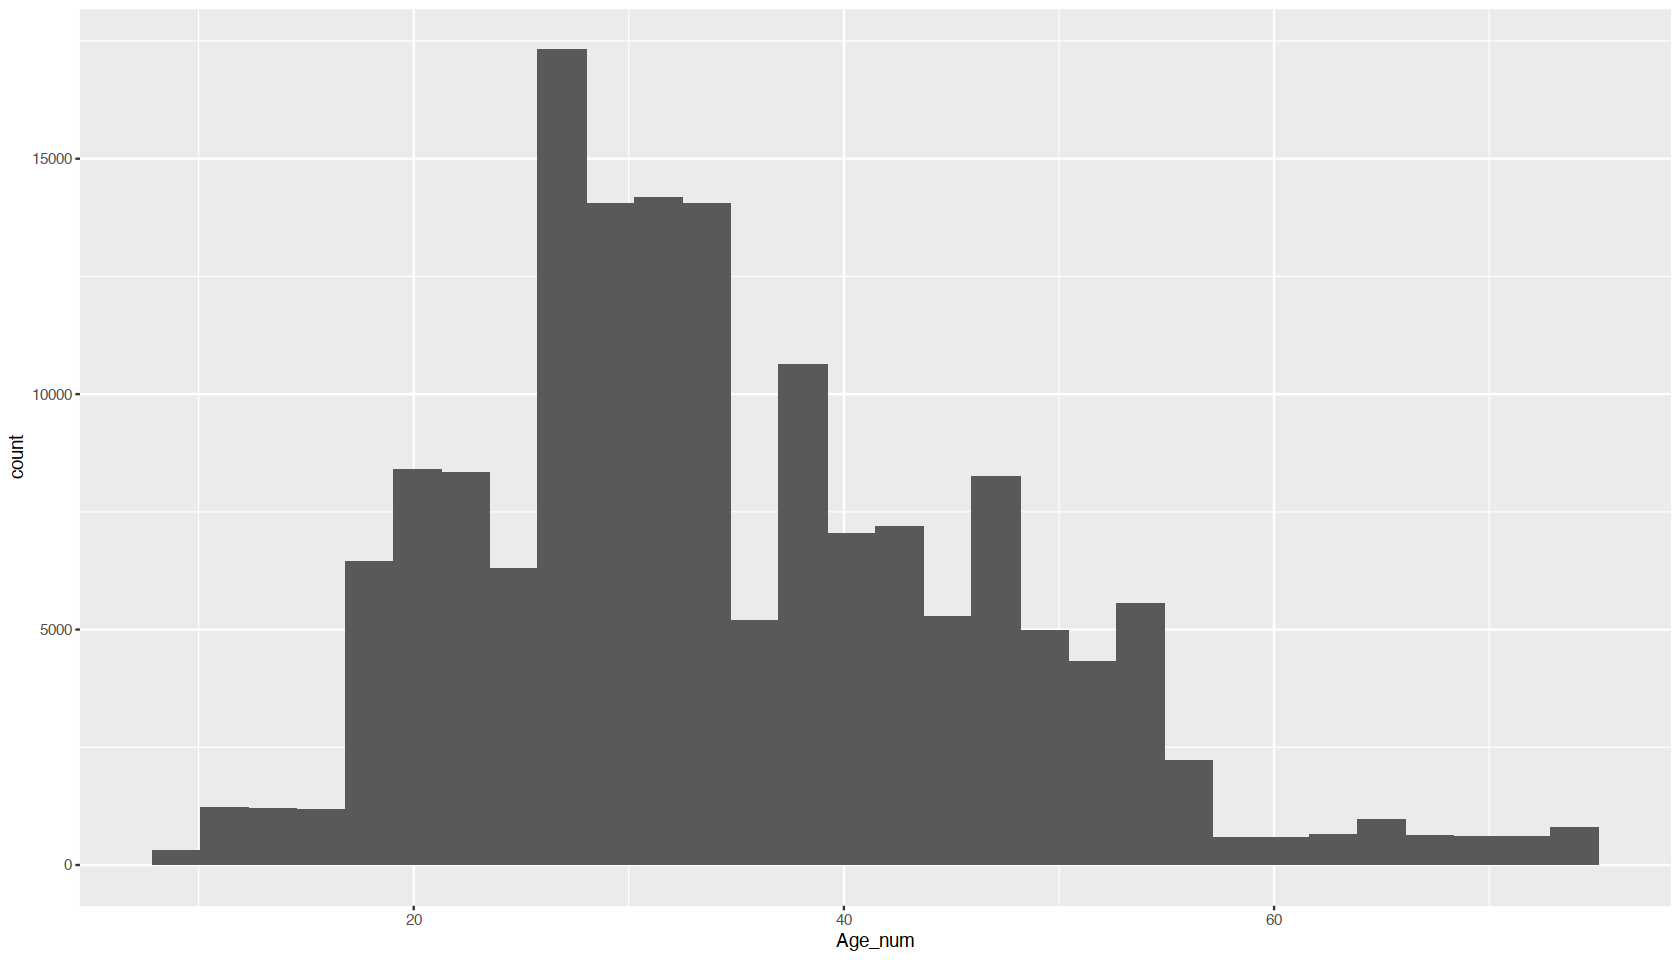

In [52]:
ggplot(data = data) +
  geom_histogram(mapping = aes(x = Age_num))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



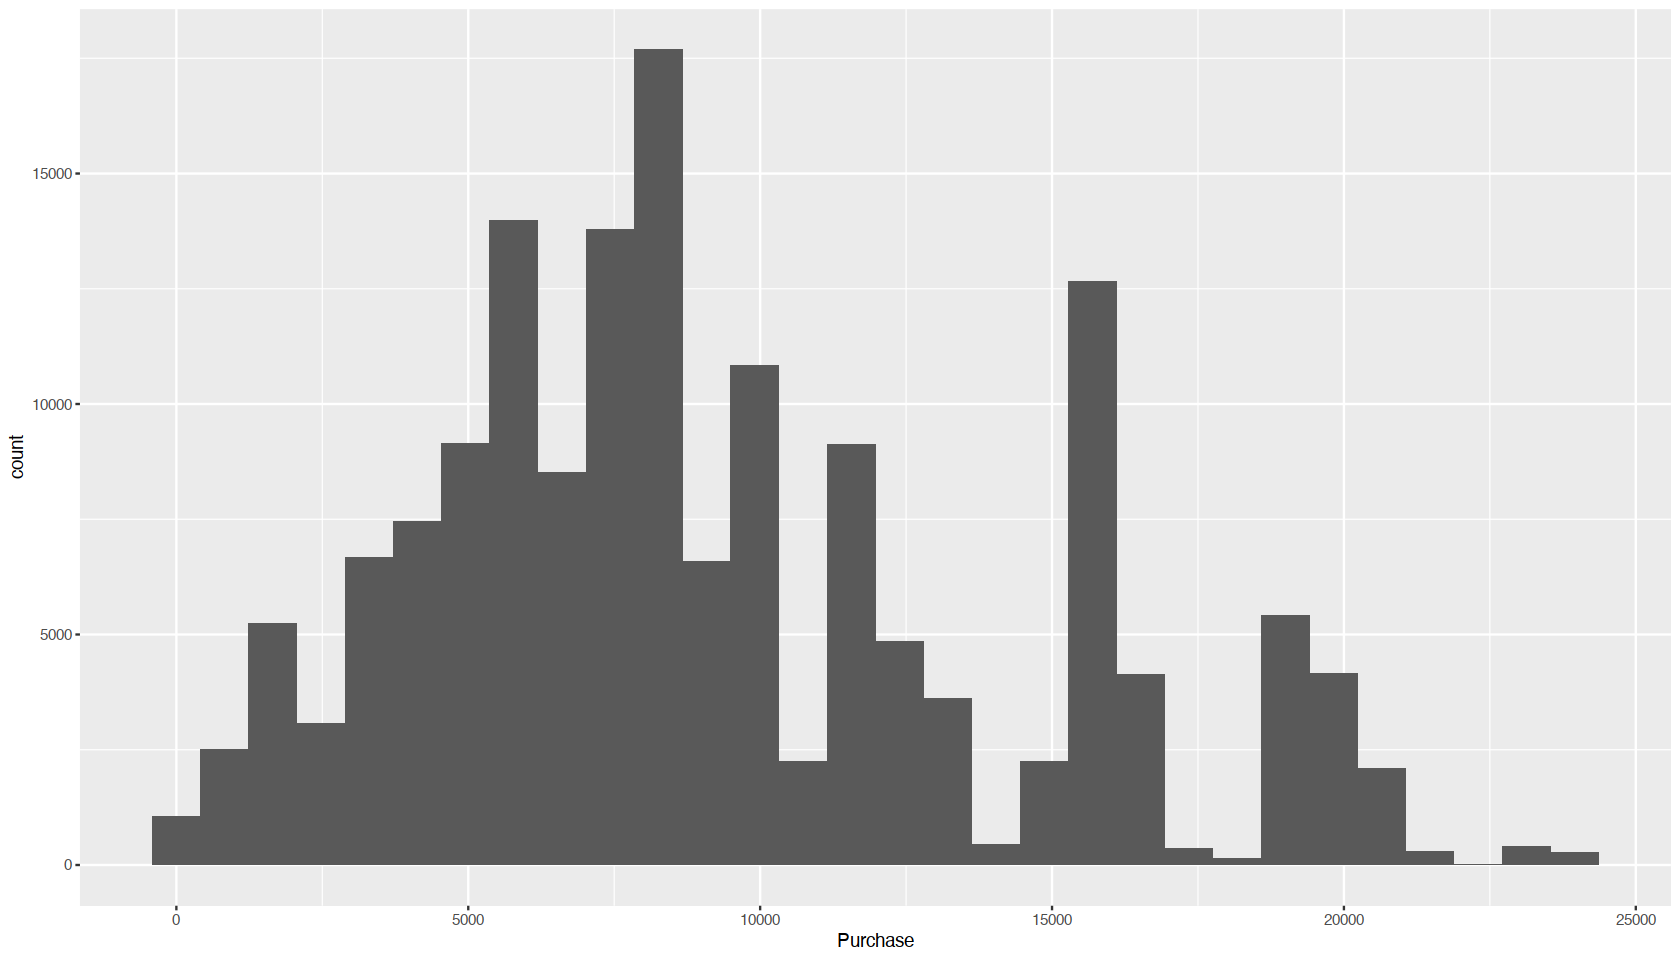

In [51]:
ggplot(data = data) +
  geom_histogram(mapping = aes(x = Purchase))

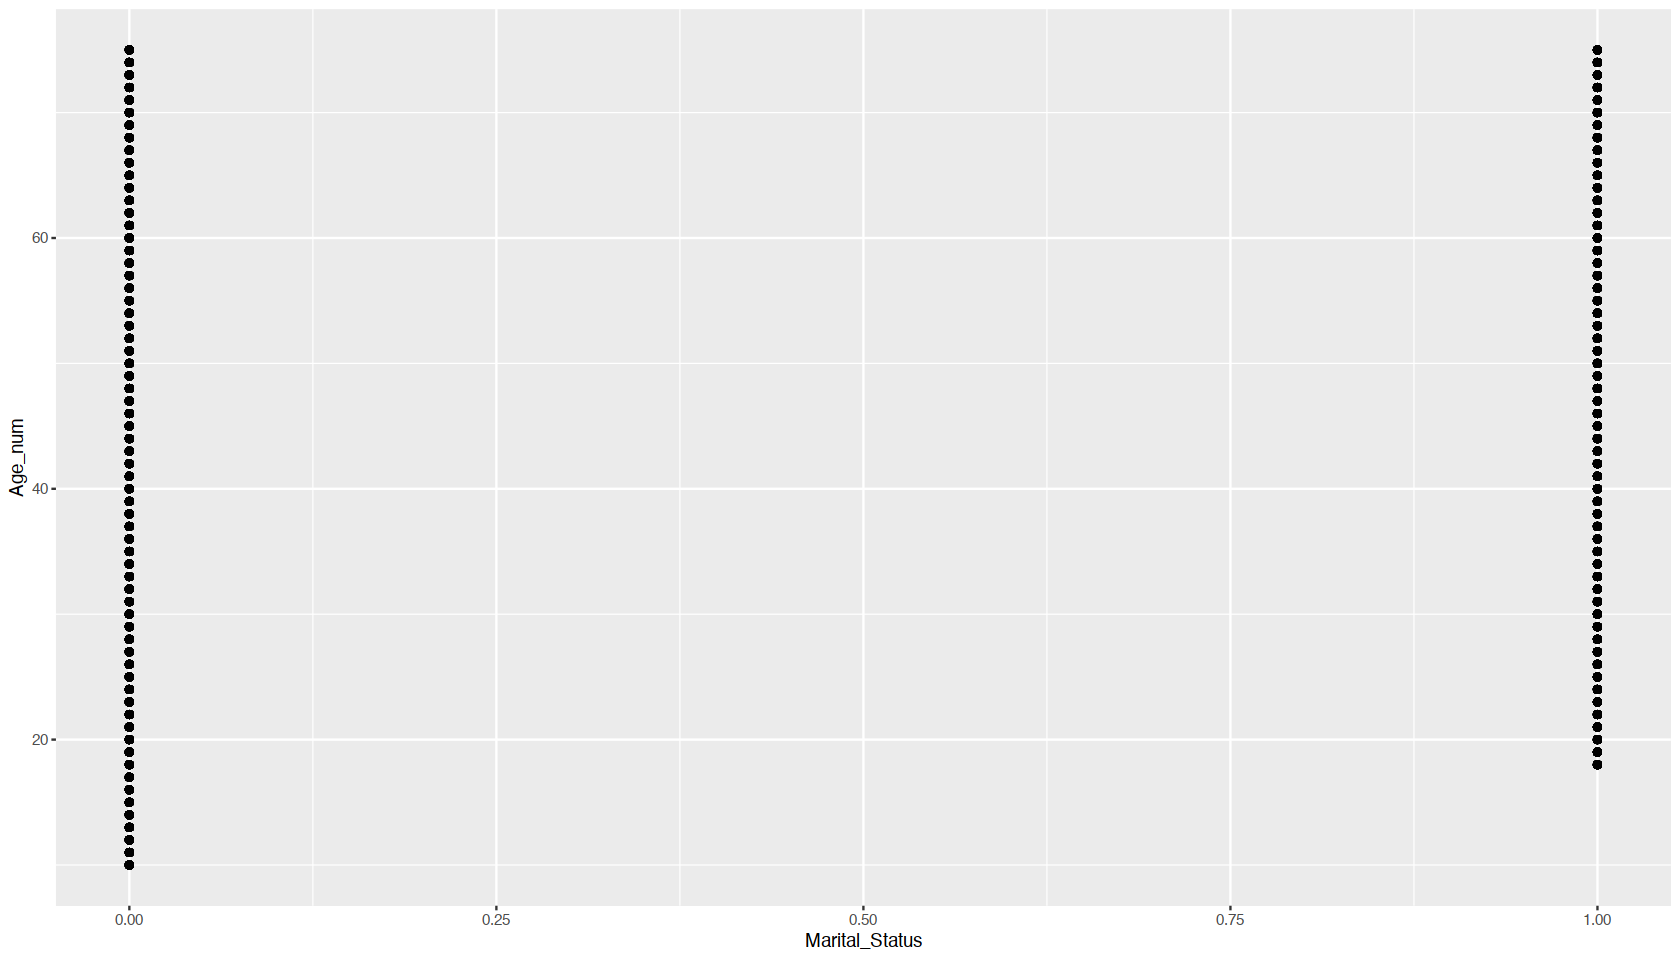

In [55]:
# plotting a scatter plot 

ggplot(data = data) +
  geom_point(mapping = aes(x = Marital_Status, y = Age_num))

In [56]:
ms =  table(data$Marital_Status)



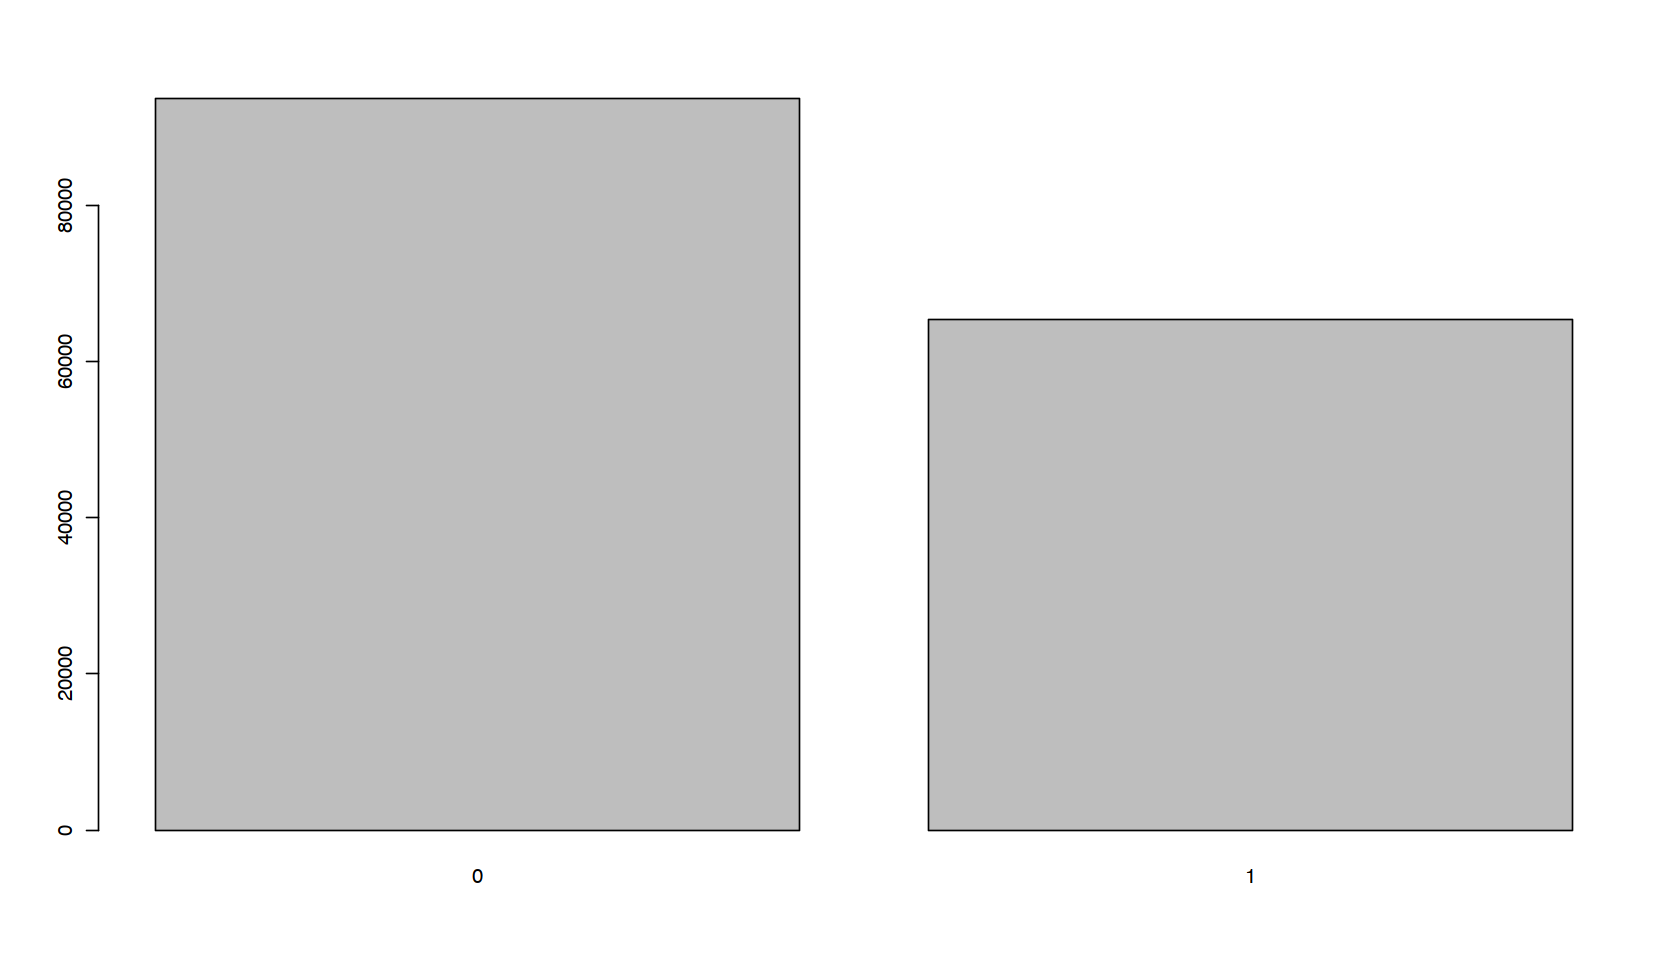

In [60]:
barplot(ms)